<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#1. Human Development Index (HDI)

In [3]:
hd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Human%20Development%20Index.xlsx?raw=true")

In [4]:
hd.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9'],axis=1, inplace=True)

In [5]:
hd

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350
...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


In [6]:
hd = hd.rename(columns={'Human Development Index (HDI) ': 'Human Development Index (HDI)'})
hd = hd.rename(columns={'Country ': 'Country'})

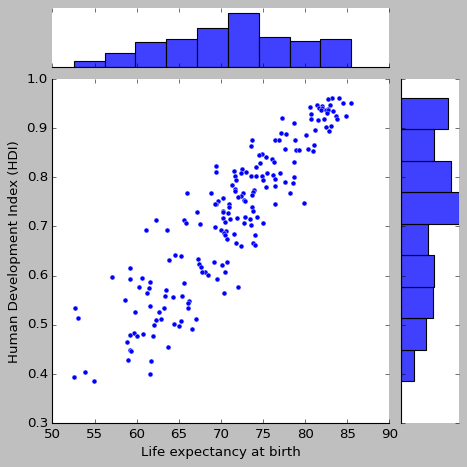

In [7]:
sns.jointplot(x ='Life expectancy at birth', y ='Human Development Index (HDI)', data = hd)

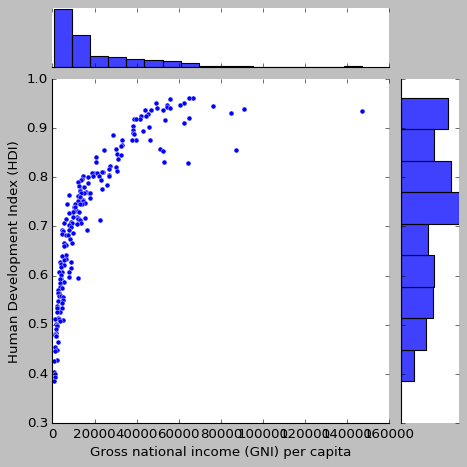

In [8]:
sns.jointplot(x ='Gross national income (GNI) per capita', y ='Human Development Index (HDI)', data = hd)

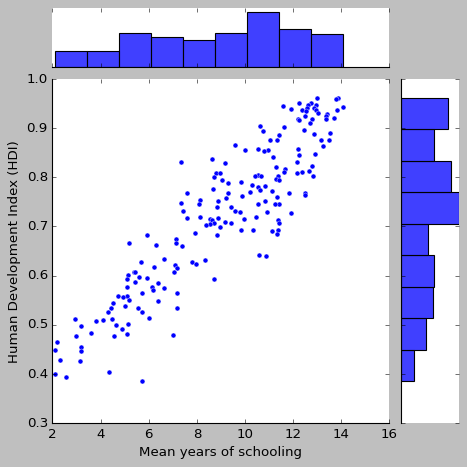

In [9]:
sns.jointplot(x ='Mean years of schooling', y ='Human Development Index (HDI)', data = hd)

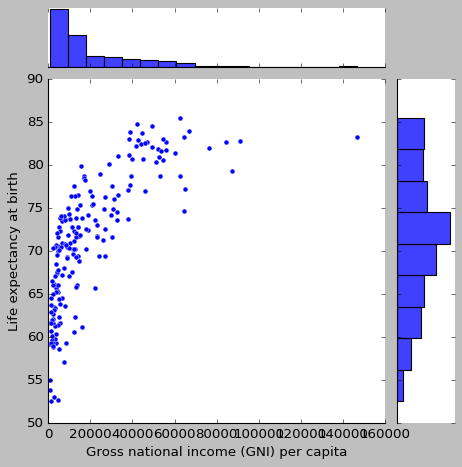

In [10]:
sns.jointplot(x ='Gross national income (GNI) per capita', y ='Life expectancy at birth', data = hd)

In [11]:
hd = hd.rename(columns={'HDI': 'Human Development Index (HDI)'})

In [12]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [13]:
! pip install geopandas 
!pip install mapclassify
import geopandas as gpd 
import mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
! wget -q -O world-countries.zip "https://github.com/XiaoLiang28/Xiao/blob/main/World_Countries_(Generalized).zip?raw=true"
zip_ref = zipfile.ZipFile('world-countries.zip', 'r'); zip_ref.extractall(); zip_ref.close()
world=gpd.read_file('World_Countries__Generalized_.shp')

In [15]:
world.dtypes

FID              int64
COUNTRY         object
ISO             object
COUNTRYAFF      object
AFF_ISO         object
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [16]:
world.head(2)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."


<Axes: >

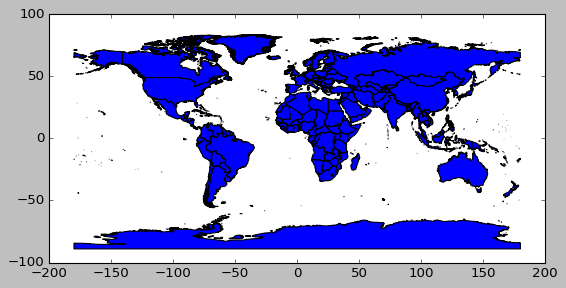

In [17]:
world.plot()

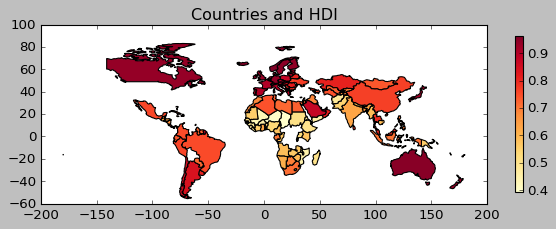

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged2 = world.merge(hd, left_on='name', right_on='Country', how='left')

merged2= merged2.reset_index()
fig, ax = plt.subplots(figsize=(9, 9))
merged2.plot(column='Human Development Index (HDI)', cmap='YlOrRd',legend_kwds={
        "shrink":.27}, ax=ax,  legend=True)
ax.set_title('Countries and HDI');

In [19]:
#How to check the unique values after merge?

<ipython-input-20-8b13b6d3afa3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = hd.corr()


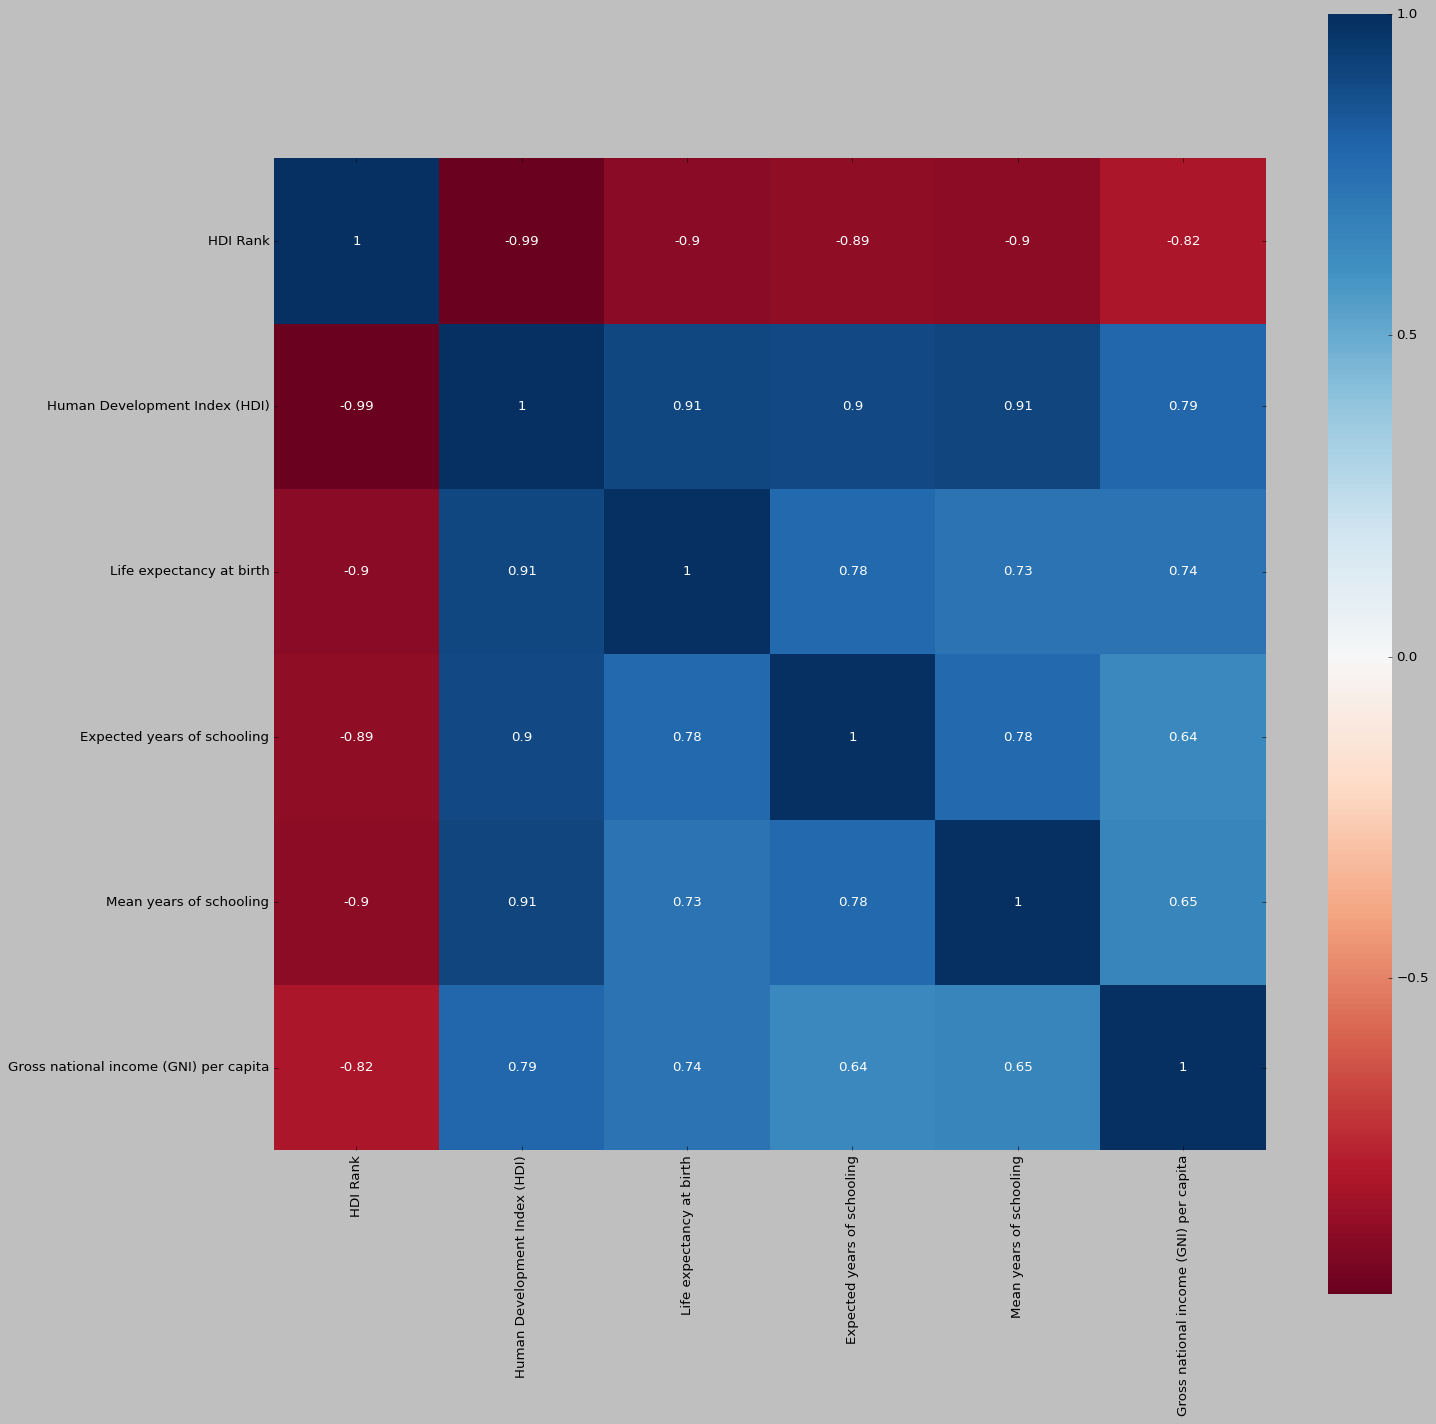

In [20]:
import seaborn as sns

corrmat = hd.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat, cmap = "RdBu", square = True, annot = True, center = 0);

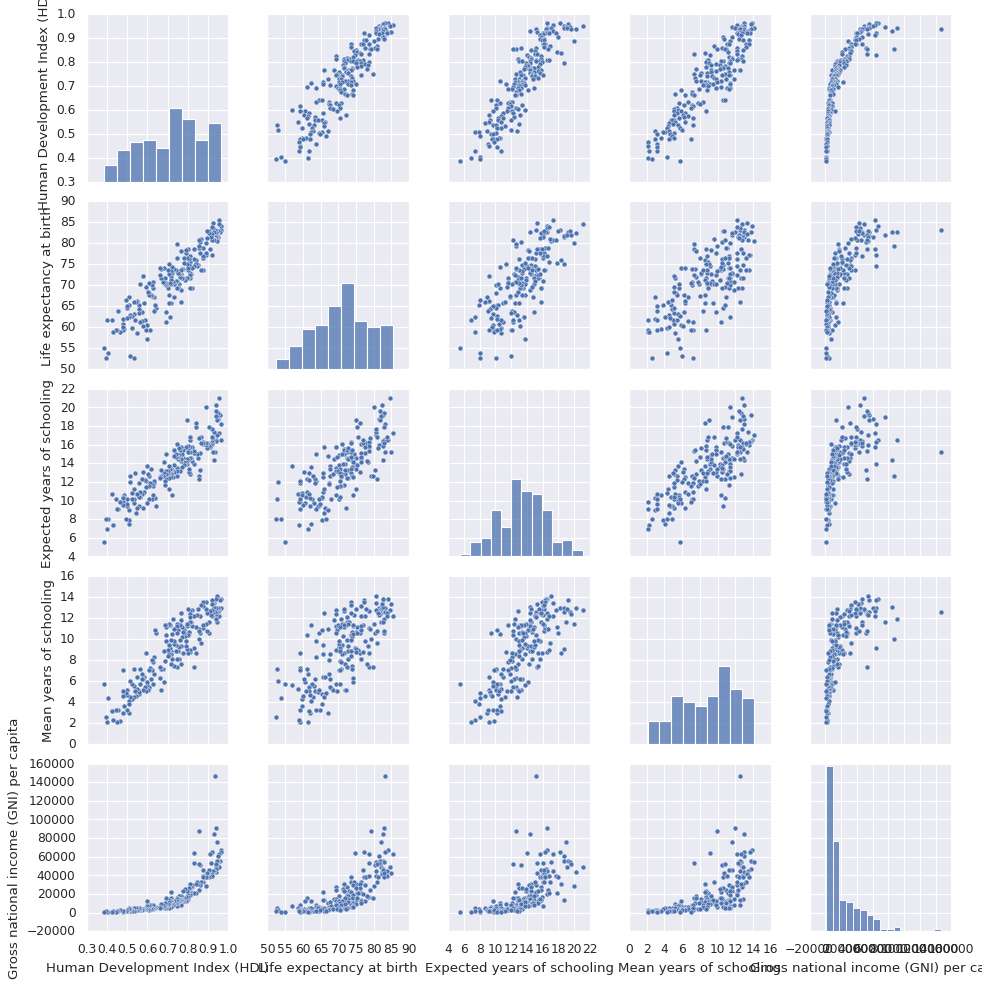

In [21]:
sns.set()
cols = ['Human Development Index (HDI)',
        'Life expectancy at birth',
        'Expected years of schooling',
        'Mean years of schooling',
        'Gross national income (GNI) per capita']
sns.pairplot(hd[cols], height = 2.5)
plt.show();

#2. Gender Inequality Index (GII)

In [22]:
gi=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Inequality%20Index.xlsx?raw=true")

In [23]:
gi=gi[6:197]

In [24]:
gi

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
6,1,Switzerland,0.018,NaN,3,NaN,5,NaN,2.212,NaN,...,NaN,96.858673,NaN,97.533417,NaN,61.728,NaN,72.705,NaN,Very High Human Development
7,2,Norway,0.016,NaN,2,NaN,2,NaN,2.336,NaN,...,NaN,99.094223,NaN,99.283562,NaN,60.294,NaN,71.95,NaN,Very High Human Development
8,3,Iceland,0.043,NaN,8,NaN,4,NaN,5.395,NaN,...,NaN,99.768417,NaN,99.662552,NaN,61.671,NaN,70.463,NaN,Very High Human Development
9,4,"Hong Kong, China (SAR)",..,NaN,..,NaN,..,NaN,1.584,NaN,...,NaN,77.100433,NaN,83.368141,NaN,53.524,NaN,65.771,NaN,Very High Human Development
10,5,Australia,0.073,NaN,19,NaN,6,NaN,8.096,NaN,...,NaN,94.580063,NaN,94.430069,NaN,61.057,NaN,70.547,NaN,Very High Human Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.505,NaN,127,NaN,548,NaN,53.621,NaN,...,NaN,7.79991,NaN,13.046886,NaN,78.991,NaN,77.379,NaN,Low Human Development
193,188,Central African Republic,0.672,NaN,166,NaN,829,NaN,160.507,NaN,...,NaN,13.94,NaN,31.56,NaN,63.312,NaN,79.486,NaN,Low Human Development
194,189,Niger,0.611,NaN,153,NaN,509,NaN,170.462,NaN,...,NaN,9.163242,NaN,15.232771,NaN,61.73,NaN,84.267,NaN,Low Human Development
195,190,Chad,0.652,NaN,165,NaN,1140,NaN,138.306,NaN,...,NaN,7.739064,NaN,24.369996,NaN,46.914,NaN,69.927,NaN,Low Human Development


In [30]:
gi.rename(columns={'Unnamed: 0':'HDI rank'},inplace=True)
gi.rename(columns={'Unnamed: 1':'country'},inplace=True)
gi.rename(columns={'Unnamed: 2':'GII Value'},inplace=True)
gi.rename(columns={'Unnamed: 6':'Maternal mortality ratio'},inplace=True)
gi.rename(columns={'Unnamed: 8':'Adolescent birth rate'},inplace=True)
gi.rename(columns={'Unnamed: 10':'Share of seats in parliament'},inplace=True)
gi.rename(columns={'Unnamed: 12':'Population with at least some secondary education female'},inplace=True)
gi.rename(columns={'Unnamed: 14':'Population with at least some secondary education male'},inplace=True)
gi.rename(columns={'Unnamed: 16':'Labour force participation rate female'},inplace=True)
gi.rename(columns={'Unnamed: 18':'Labour force participation rate male'},inplace=True)
gi.rename(columns={'Unnamed: 20':'Human Development'},inplace=True)

In [31]:
gi = gi.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17'], axis=1)

KeyError: ignored

In [32]:
gi = gi.drop(['Unnamed: 19'], axis=1)

In [33]:
gi

,HDI rank,country,GII Value,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,Population with at least some secondary education female,Population with at least some secondary education male,Labour force participation rate female,Labour force participation rate male,Human Development
6,1,Switzerland,0.018,5,2.212,39.837398,96.858673,97.533417,61.728,72.705,Very High Human Development
7,2,Norway,0.016,2,2.336,44.970414,99.094223,99.283562,60.294,71.95,Very High Human Development
8,3,Iceland,0.043,4,5.395,47.619048,99.768417,99.662552,61.671,70.463,Very High Human Development
9,4,"Hong Kong, China (SAR)",..,..,1.584,..,77.100433,83.368141,53.524,65.771,Very High Human Development
10,5,Australia,0.073,6,8.096,37.885463,94.580063,94.430069,61.057,70.547,Very High Human Development
...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.505,548,53.621,38.888889,7.79991,13.046886,78.991,77.379,Low Human Development
193,188,Central African Republic,0.672,829,160.507,12.857143,13.94,31.56,63.312,79.486,Low Human Development
194,189,Niger,0.611,509,170.462,25.903614,9.163242,15.232771,61.73,84.267,Low Human Development
195,190,Chad,0.652,1140,138.306,32.258065,7.739064,24.369996,46.914,69.927,Low Human Development


In [34]:
gi1 = gi.replace('..', np.nan)

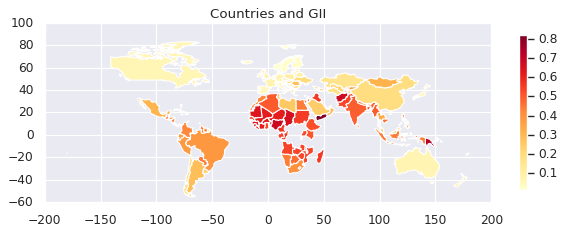

In [36]:
world2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged3 = world.merge(gi1, left_on='name', right_on='country', how='left')

merged3= merged3.reset_index()
fig, ax = plt.subplots(figsize=(9, 9))
merged3.plot(column='GII Value', cmap='YlOrRd',legend_kwds={
        "shrink":.27}, ax=ax,  legend=True)
ax.set_title('Countries and GII');

<Axes: xlabel='Labour force participation rate female', ylabel='Population with at least some secondary education female'>

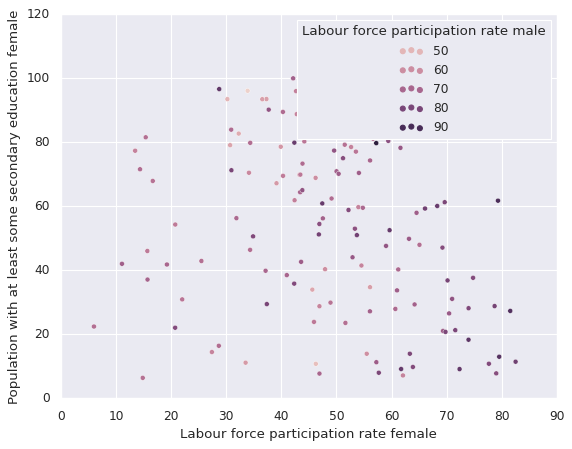

In [29]:
sns.scatterplot(data=gi1,x='Labour force participation rate female',y='Population with at least some secondary education female',hue='Labour force participation rate male')